In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

########### NLP #############
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

################ visualization ################
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data= pd.read_csv('20220422-Campa+¦as Etiquetadas updated.csv', encoding='latin-1')
data.head()

,Etiquetas,Mensaje
0,Comunidad,RT @Camiloparada: En el 2010 Pi?era nombr com...
1,Mineria,RT @Camiloparada: En el 2010 Pi?era nombr com...
2,Comunidad,RT @Camiloparada: En el 2010 Pi?era nombr com...
3,Mineria,RT @Camiloparada: En el 2010 Pi?era nombr com...
4,NaN,RT @Camiloparada: En el 2010 Pi?era nombr com...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12930 entries, 0 to 12929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Etiquetas  6802 non-null   object
 1   Mensaje    12897 non-null  object
dtypes: object(2)
memory usage: 202.2+ KB


In [5]:
# check description
data.describe().T

,count,unique,top,freq
Etiquetas,6802,59,pol pub,2511
Mensaje,12897,7067,Sin contenido,162


In [6]:
# check null values
data.isnull().sum()

Etiquetas    6128
Mensaje        33
dtype: int64

In [7]:
# data=data.drop(['Fuente','Autor','Fecha','Hora','Seguidores','Interacciones','Viralizaciones','Impacto','ID_DB','Keywords'],inplace=True, axis = 1 )
# data

In [8]:
df = data.dropna()
df.shape

(6784, 2)

In [9]:
# check null values
df.isnull().sum()

Etiquetas    0
Mensaje      0
dtype: int64

In [10]:
print(data.shape)
print(df.shape)

(12930, 2)
(6784, 2)


In [11]:
df['category_id'] = df['Etiquetas'].factorize()[0]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [12]:
df.head()

,Etiquetas,Mensaje,category_id
0,Comunidad,RT @Camiloparada: En el 2010 Pi?era nombr com...,0
1,Mineria,RT @Camiloparada: En el 2010 Pi?era nombr com...,1
2,Comunidad,RT @Camiloparada: En el 2010 Pi?era nombr com...,0
3,Mineria,RT @Camiloparada: En el 2010 Pi?era nombr com...,1
50,Empresa,Acaba de publicar una foto en Minera Caserones...,2


In [13]:
colslist = ['Etiquetas','Mensaje','category_id']
df.columns = colslist

In [14]:
Index=df['Etiquetas'].value_counts()

# data preprocessing

In [15]:
# print(stopwords.fileids(),'\n')

In [16]:
print(df["Mensaje"][1])

RT @Camiloparada: En el 2010 Pi?era nombr como intendente de Coquimbo a Rafael Prohens, actual senador, quien ademÿs es presidente de Prod?


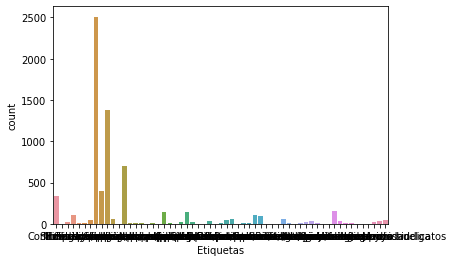

In [17]:
%matplotlib inline

ax = sns.countplot(x='Etiquetas', data=df)
plt.show()


## Basic preprocessing

In [19]:
print(len(df['Mensaje'][0]))

140


## Porter Stemming

In [20]:
df['Mensaje_porter_stemmed'] = df['Mensaje'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Etiquetas,Mensaje,category_id,Mensaje_porter_stemmed
0,Comunidad,RT @Camiloparada: En el 2010 Pi?era nombr com...,0,rt @camiloparada: en el 2010 pi?er nombr com ...
1,Mineria,RT @Camiloparada: En el 2010 Pi?era nombr com...,1,rt @camiloparada: en el 2010 pi?er nombr com ...
2,Comunidad,RT @Camiloparada: En el 2010 Pi?era nombr com...,0,rt @camiloparada: en el 2010 pi?er nombr com ...
3,Mineria,RT @Camiloparada: En el 2010 Pi?era nombr com...,1,rt @camiloparada: en el 2010 pi?er nombr com ...
50,Empresa,Acaba de publicar una foto en Minera Caserones...,2,acab de public una fot en miner caseron lumin ...


In [21]:
print(df['Mensaje'][0])

RT @Camiloparada: En el 2010 Pi?era nombr como intendente de Coquimbo a Rafael Prohens, actual senador, quien ademÿs es presidente de Prod?


In [22]:
print(df['Mensaje_porter_stemmed'][0])

rt @camiloparada: en el 2010 pi?er nombr com intendent de coquimb a rafael prohens, actual senador, qui ademÿs es president de prod?


## Converting TO LowerCase

In [23]:
df['Mensaje_porter_stemmed'] = df['Mensaje_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [24]:
print(df['Mensaje_porter_stemmed'][0])

rt @camiloparada: en el 2010 pi?er nombr com intendent de coquimb a rafael prohens, actual senador, qui ademÿs es president de prod?


## Removing Punctuation

In [25]:
df['Mensaje_porter_stemmed'] = df['Mensaje_porter_stemmed'].str.replace('[^\w\s]','')

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [26]:
df['Mensaje_porter_stemmed'][0]

'rt camiloparada en el 2010 pier nombr com intendent de coquimb a rafael prohens actual senador qui ademÿs es president de prod'

## Low frequency term filtering (count < 3)

In [27]:
freq = pd.Series(' '.join(df['Mensaje_porter_stemmed']).split()).value_counts()

In [28]:
freq.head()

de    12844
la     5799
en     4812
y      3965
rt     3925
dtype: int64

In [29]:
freq2 = freq[freq <= 3]
freq2

jornada               3
team                  3
suen                  3
httpstconinkc71cvx    3
5ta                   3
                     ..
httpstcokzxx11pm88    1
elena                 1
1031                  1
httpstcoryptsjml8c    1
frontis               1
Length: 9177, dtype: int64

In [30]:
freq3 = list(freq2.index.values)
freq3

['jornada',
 'team',
 'suen',
 'httpstconinkc71cvx',
 '5ta',
 'continuarÿ',
 'deempres',
 'alcaldes',
 'madrug',
 'sorprend',
 'publican',
 '95',
 'pet',
 'omjminer',
 'gob_interior',
 'xito',
 'most',
 'poblete',
 'httpstcozurclmc2hx',
 'delgadoqueved',
 'abrirÿn',
 'cge',
 'dedicacin',
 'portafolioc',
 'maul',
 '959',
 'ciel',
 'conaf_minagri',
 '1530',
 'pamel',
 'campo',
 'miercol',
 'entiend',
 '0700',
 'privados',
 'fantasa',
 'dems',
 'httpstcowvpmfe4qtr',
 'segura',
 'httpstcoj4ykng5zkg',
 'aloj',
 'sierra',
 'mineralpropert1',
 'atrev',
 'nuestropuntodeencuentr',
 'sirv',
 'ocasion',
 'pizarr',
 'venta',
 'httpstcoyrgevvgxny',
 'lacomun',
 'especializ',
 'color',
 'httpstcovuypechxg4',
 'comis',
 'henry',
 'bilz',
 'conviccin',
 'rincn',
 'recint',
 'protej',
 'plc',
 'conceptual',
 'simul',
 'conduct',
 'turnos',
 'katj',
 'festival',
 'mayoritari',
 'anoth',
 'inminent',
 '1er',
 'ejerc',
 'anglo',
 'mental',
 'vistan',
 'agradeci',
 'who',
 'escud',
 'postdoctoral',
 'grupo

In [31]:
df['Mensaje_porter_stemmed'] = df['Mensaje_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [32]:
df["Etiquetas"] = [col.replace(" ", "_") for col in df.Etiquetas]
print(df.Etiquetas)

0                      Comunidad
1                        Mineria
2                      Comunidad
3                        Mineria
50                       Empresa
                  ...           
12896    huelga,apoyo_sindicatos
12897    huelga,apoyo_sindicatos
12898    huelga,apoyo_sindicatos
12899    huelga,apoyo_sindicatos
12900    huelga,apoyo_sindicatos
Name: Etiquetas, Length: 6784, dtype: object


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [33]:
df.Etiquetas.unique()

array(['Comunidad', 'Mineria', 'Empresa', 'Huelga', 'Sindicatos',
       'Sindicatos,Huelga', 'Huelga,Sindicatos', 'pol_pub', 'huelga',
       'comunidad', 'sindicatos', 'sindicatos,pol_pub', 'privados',
       'comunidad,pol_pub', 'pol_pub,comunidad', 'privados,pol_pub',
       'privados,comunidad', 'comunidad,privados', 'pol_pub,privados',
       'medios', 'privados,medios', 'medios,pol_pub', 'privado',
       'poli_pub', 'negocio', 'contaminacion', 'Comunidad,pol_pub',
       'Otras_empresas', 'pol_pub,Otras_empresas', 'mineras', 'Privados',
       'Pol\xadtica', 'Privados,Comunidad', 'Comunidad,Pol\xadtica',
       'paro', 'otras_mineras', 'autoridad', 'comunidad,autoridad',
       'otras_mineras,autoridad', 'tension,huelga', 'mineria_afta',
       'mineria_afta,otras_mineras', 'otras_mineras,mineria_afta',
       'huelga,tension', 'tension', 'bonos', 'huelga,bonos',
       'bonos,huelga', 'bonos,tension', 'apoyo_sindical', 'inicio_huelga',
       'fracaso', 'bono', 'bloqueo_camino

In [34]:
df['label'] = "__label__" + df["Etiquetas"]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [35]:
df.head()

,Etiquetas,Mensaje,category_id,Mensaje_porter_stemmed,label
0,Comunidad,RT @Camiloparada: En el 2010 Pi?era nombr com...,0,rt camiloparada en el 2010 pier nombr com inte...,__label__Comunidad
1,Mineria,RT @Camiloparada: En el 2010 Pi?era nombr com...,1,rt camiloparada en el 2010 pier nombr com inte...,__label__Mineria
2,Comunidad,RT @Camiloparada: En el 2010 Pi?era nombr com...,0,rt camiloparada en el 2010 pier nombr com inte...,__label__Comunidad
3,Mineria,RT @Camiloparada: En el 2010 Pi?era nombr com...,1,rt camiloparada en el 2010 pier nombr com inte...,__label__Mineria
50,Empresa,Acaba de publicar una foto en Minera Caserones...,2,acab de public una fot en miner caseron lumin ...,__label__Empresa


In [36]:
df1 = df.drop(['Etiquetas' , 'Mensaje' , 'category_id'],axis=1)

In [37]:
df1 = df1[['label' , 'Mensaje_porter_stemmed']]

In [38]:
df1.head()

,label,Mensaje_porter_stemmed
0,__label__Comunidad,rt camiloparada en el 2010 pier nombr com inte...
1,__label__Mineria,rt camiloparada en el 2010 pier nombr com inte...
2,__label__Comunidad,rt camiloparada en el 2010 pier nombr com inte...
3,__label__Mineria,rt camiloparada en el 2010 pier nombr com inte...
50,__label__Empresa,acab de public una fot en miner caseron lumin ...


In [39]:
training , validation = train_test_split(df1, test_size=0.05)

In [40]:
print(training.shape)
print(validation.shape)

(6444, 2)
(340, 2)


In [42]:
np.savetxt('./tmp/training.txt', training.values, fmt='%s')
np.savetxt('./tmp/validation.txt', validation.values, fmt='%s')

In [43]:
!head -5 ./tmp/training.txt

__label__apoyo_sindical rt sindicatosiil trabaj de divisin andin de codelc protest en santiag en la cas matriz a de la huelga fueron cerc d
__label__comunidad rt ofert de trabaj en atacama en lumin copp estÿn busc ingenier e ingen par copiap revis los detalles
__label__huelga rt tiofonti grup armad ya estÿn atac atacama el modus operandi de la macr zon sur esta aument en el nort de nuestr pa
__label__pol_pub la peque miner es la principal activ econm de atacam y por primer vez en la historia se decidi apoy a este sector con recurs del goreatacama apoy recib por faen com sant 1 al 18 en la comun de vallenar
__label__comunidad rt luiserrazuriz orreg infinitafm en seri una milit de tu part entreg las ltim accion de agu a miner caseron y jai


# Store Data in s3 Bucket

In [44]:
import boto3
import sagemaker

print(sagemaker.__version__)

session = sagemaker.Session()
bucket = session.default_bucket()

2.86.2


In [45]:
# Run this cell if you want to use the data you processed manually

prefix = 'birs-spanish'

s3_train_path = session.upload_data(path='./tmp/training.txt', bucket=bucket, key_prefix=prefix+'/input/train')
s3_val_path = session.upload_data(path='./tmp/validation.txt', bucket=bucket, key_prefix=prefix+'/input/validation')
s3_output = 's3://{}/{}/output/'.format(bucket, prefix)

print(s3_train_path)
print(s3_val_path)
print(s3_output)

s3://sagemaker-us-east-1-122514903081/birs-spanish/input/train/training.txt
s3://sagemaker-us-east-1-122514903081/birs-spanish/input/validation/validation.txt
s3://sagemaker-us-east-1-122514903081/birs-spanish/output/


# Training the BlazingText model for supervised text classification

**BlazingText:** The Amazon SageMaker BlazingText algorithm provides highly optimized implementations of the Word2vec and text classification algorithms. The Word2vec algorithm is useful for many downstream natural language processing (NLP) tasks, such as sentiment analysis, named entity recognition, machine translation, etc. Text classification is an important task for applications that perform web searches, information retrieval, ranking, and document classification.

**BlazingText for text classification:** Ability to perform high speed multi-class and and multi-label text classification. The goal of text classification is to automatically classify the text documents into one or more defined categories, like spam detection, sentiment analysis, or user reviews categorization.

In [46]:
from sagemaker import image_uris

region = boto3.Session().region_name    
container = image_uris.retrieve('blazingtext', region)
print(container)

811284229777.dkr.ecr.us-east-1.amazonaws.com/blazingtext:1


In [53]:
role = sagemaker.get_execution_role()

bt = sagemaker.estimator.Estimator(container,
                                   role, 
                                   instance_count=1, 
                                   instance_type='ml.c5.2xlarge',
                                   output_path=s3_output)

In [54]:
bt.set_hyperparameters(
    mode= "supervised",
    epochs= 50,
    min_count= 2,
    learning_rate= 0.001,
    vector_dim= 10,
    early_stopping= False,
    patience= 4
)

In [55]:
train_data = sagemaker.TrainingInput(s3_train_path, 
                      distribution='FullyReplicated', 
                      content_type='text/plain',
                      s3_data_type='S3Prefix')

validation_data = sagemaker.TrainingInput(s3_val_path,
                      distribution='FullyReplicated', 
                      content_type='text/plain', 
                      s3_data_type='S3Prefix')

s3_channels = {'train': train_data, 'validation': validation_data}

In [56]:
bt.fit(inputs=s3_channels)

2022-06-28 07:58:25 Starting - Starting the training job...
2022-06-28 07:58:49 Starting - Preparing the instances for trainingProfilerReport-1656403105: InProgress
......
2022-06-28 07:59:49 Downloading - Downloading input data...
2022-06-28 08:00:14 Training - Training image download completed. Training in progress.Arguments: train
[06/28/2022 08:00:17 WARNING 139798467905344] Loggers have already been setup.
[06/28/2022 08:00:17 WARNING 139798467905344] Loggers have already been setup.
[06/28/2022 08:00:17 INFO 139798467905344] nvidia-smi took: 0.05033087730407715 secs to identify 0 gpus
[06/28/2022 08:00:17 INFO 139798467905344] Running single machine CPU BlazingText training using supervised mode.
Number of CPU sockets found in instance is  1
[06/28/2022 08:00:17 INFO 139798467905344] Processing /opt/ml/input/data/train/training.txt . File size: 0.9018831253051758 MB
[06/28/2022 08:00:17 INFO 139798467905344] Processing /opt/ml/input/data/validation/validation.txt . File size: 0.0

# Hosting Data In Prodection Environment

Once the training is done, we can deploy the trained model as an Amazon SageMaker real-time hosted endpoint. This will allow us to make predictions (or inference) from the model.

In [51]:
bt_predictor = bt.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

---------!

# Prediction
### Use JSON format for inference

BlazingText supports application/json as the content-type for inference. The payload should contain a list of sentences with the key as **"instances"** while being passed 
to the endpoint.

**Note:** By default, the model will return only one prediction, the one with the highest probability. For retrieving the top k predictions, you can set k in the configuration as shown below:

In [52]:
import json
import pprint

sentences = ['RT @KinrossChile: Echa un vistazo a las prÿcticas de nuestros aprendices en el simulador de cami›n de extracci›n 785-C ?? que tenemos a disp?']

payload = {"instances" : sentences, "configuration": {"k": 4}}

bt_predictor.serializer = sagemaker.serializers.JSONSerializer()
response = bt_predictor.predict(payload)

print(response)

b'[{"label": ["__label__pol_pub", "__label__comunidad", "__label__privados", "__label__huelga"], "prob": [0.31475916504859924, 0.07760695368051529, 0.027172908186912537, 0.017927976325154305]}]'


In [132]:
import json
import pprint

sentences = ['RT @Mineria_Atacama: ??Los programas de beneficios para la peque?a miner­a y miner­a artesanal son hist›ricos. Gracias al @GobiernodeChile a?']

payload = {"instances" : sentences, "configuration": {"k": 58}}

bt_predictor.serializer = sagemaker.serializers.JSONSerializer()
response = bt_predictor.predict(payload)
print(response)

b'[{"label": ["__label__pol_pub", "__label__comunidad", "__label__privados", "__label__huelga", "__label__Comunidad", "__label__apoyo_sindical", "__label__poli_pub", "__label__medios", "__label__otras_mineras", "__label__Huelga", "__label__autoridad", "__label__mineria_afta", "__label__Pol\xc2\xadtica", "__label__sindicatos", "__label__Privados", "__label__huelga,apoyo_sindicatos", "__label__Huelga,Sindicatos", "__label__bonos", "__label__Otras_empresas", "__label__inicio_huelga", "__label__tension", "__label__Medios", "__label__apoyos", "__label__Empresa", "__label__privado", "__label__mineria_afta,otras_mineras", "__label__negocio", "__label__fracaso", "__label__bono", "__label__paro", "__label__Sindicatos,Huelga", "__label__comunidad,pol_pub", "__label__huelga,bonos", "__label__mineras", "__label__pol_pub,comunidad", "__label__huelga,tension", "__label__Sindicatos", "__label__Comunidad,Pol\xc2\xadtica", "__label__comunidad,privados", "__label__privados,pol_pub", "__label__privados,m

# Stop / Close the Endpoint (Optional)
Finally, we should delete the endpoint before we close the notebook if we don't need to keep the endpoint running for serving realtime predictions.

In [57]:
bt_predictor.delete_endpoint()

In [9]:
!python src/spanish_text_classification.py

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Traceback (most recent call last):
  File "src/spanish_text_classification.py", line 45, in <module>
    parser.add_argument('--model-dir', type=str, default=os.environ['SM_MODEL_DIR'])
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/os.py", line 669, in __getitem__
    raise KeyError(key) from None
KeyError: 'SM_MODEL_DIR'
